In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

# Loading Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Shape of dataset
print(boston.data.shape)

(506, 13)


In [2]:


# Shape of target values
print(boston.target.shape)



(506,)


# Implementing SGD on LINEAR REGRESSION

In [18]:
data = boston.data

# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardised_data = sc.fit_transform(data)

# Adding a new feature to the data which will contain only ones for ease in computation 
additional_feature = np.ones(boston.data.shape[0])

# Matrix having new additional feature X0 which will be multiplied with W0 for the ease of computation
feature_data = np.vstack((additional_feature,standardised_data.T)).T

# Actual prices of houses
target_price = boston.target


# Stochastic Gradient Descent Algorithm :
# Let 'K' be the number of random rows selected out of the dataset
# Initialize the weight vector
#Let r = learning_rate and m = number of training_examples
# Let r =1
# repeat until convergence {
#    weight[j] = weight[j] - (r/m)*((Σfrom i=1 to K)of(((weight.T * feature_data[i]) - target_price[i])* feature_data[i,j])
#    r /= 2  
#}

# Final hypothesis for linear regression
# predicted_prices = (final_weights.T)*(test_data_matrix)


# Train and Test split of data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_price, test_size = 0.2, random_state = 5)

In [19]:
weights = np.random.normal(0,1,feature_data.shape[1])

# Initialised Weights
weights

array([-1.15963236,  0.33011477, -0.86019741,  1.0099786 , -1.35714136,
       -1.38579532, -1.45365247,  0.29714241,  1.23960787, -1.20030376,
        0.54843814, -1.02302391,  0.41257503,  0.55951933])

In [20]:
temp_w = np.zeros(feature_data.shape[1])

# Initialising learning rate
r = 0.001

# Number of training examples
m = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 20
from numpy import random
random_ids = random.choice(m,m,replace=False)
X_shuffled = X_train[random_ids,:]
y_shuffled = Y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights

In [21]:
manual_sgd_predictions = np.zeros(X_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]

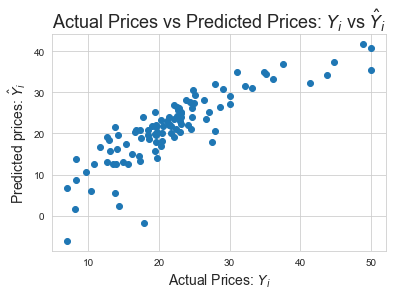

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

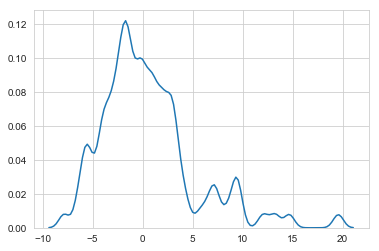

In [23]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

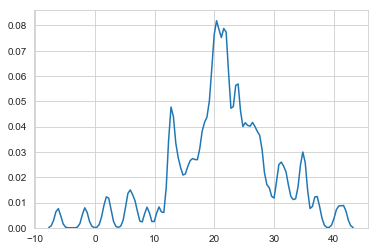

In [24]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [25]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(Y_test, manual_sgd_predictions))
print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(Y_test, manual_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.46258883502355
Mean Squared Error for Implementation of SGD from Scratch is :  23.006938128902515
Root Mean Squared Error for Implementation of SGD from Scratch is :  4.796554818711292


# Implementing SKLEARN's SGD Regression

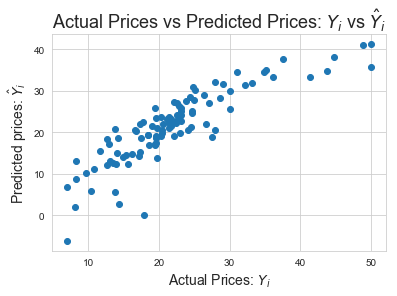

In [26]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
sgd.fit(X_train, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

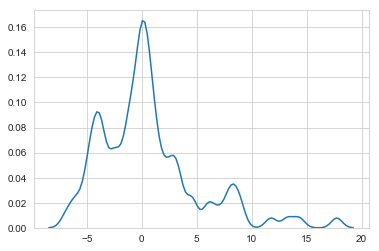

In [27]:
delta_y = Y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

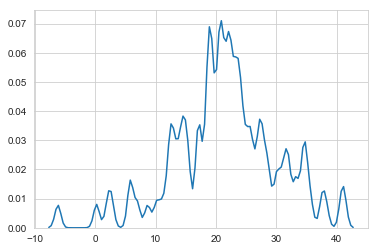

In [28]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.216980566308476
Mean Squared Error for Implementation of SGD using SKLEARN is :  20.909418296472072
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  4.572681740124943


# Comparing the weights produced by both Manual SGD and Sklearn's SGD

In [30]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD",manual_sgd_weights)
ptable.add_column("Weights of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-------+-----------------------+--------------------------+
| S.NO. | Weights of Manual SGD | Weights of Sklearn's SGD |
+-------+-----------------------+--------------------------+
|   1   |   -888.5270082089373  |    11.208861037378409    |
|   2   |  -0.12398070916437753 |   -1.1200602977305578    |
|   3   |  0.06067971265178232  |    1.152694710316591     |
|   4   |  -0.08342532587764778 |   0.007003494683119167   |
|   5   |   2.6056363903404227  |    0.6585935395421793    |
|   6   |   0.8252371317510938  |   -1.8589934113364546    |
|   7   |   3.5965692284447397  |    2.377156199400088     |
|   8   | -0.007686472374430275 |   0.04600444194590562    |
|   9   |  -1.2243658428222741  |    -3.15271208432165     |
|   10  |   0.2917754287422282  |    3.1768250933820474    |
|   11  | -0.010257821824663334 |   -2.2173953431094824    |
|   12  |  -0.7390589015621195  |    -2.071132495546765    |
|   13  |  0.01324333707518958  |    1.1005220080336422    |
|   14  |  -0.6109083391

# Scatter Plot of the predictions of both manual and sklearn SGD Regression

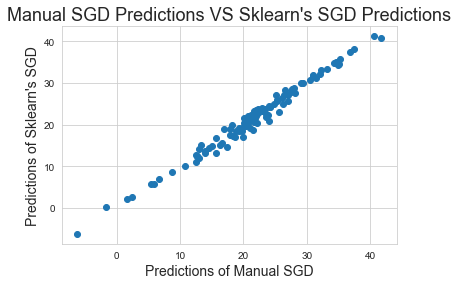

In [31]:
plt.scatter(manual_sgd_predictions, sklearn_sgd_predictions)
plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions",size=18)
plt.show()

## Observations

From the above plot we can see that Both the SGD_REGRESSION and implemented regression providing almost exact results for test data